In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in the Data

In [33]:
%time df=pd.read_csv("visits_small.csv", parse_dates=['DateTime'])

list(df)
df.info()
df.shape
df.head()
df.tail()

Wall time: 24.7 s


['Unnamed: 0',
 'Visit_ID',
 'DateTime',
 'Customer_ID',
 'Sequence_Num',
 'Store_ID',
 'Dwell_Time']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141628 entries, 0 to 141627
Data columns (total 7 columns):
Unnamed: 0      141628 non-null int64
Visit_ID        141628 non-null int64
DateTime        141628 non-null datetime64[ns]
Customer_ID     141628 non-null int64
Sequence_Num    141628 non-null int64
Store_ID        141628 non-null int64
Dwell_Time      141628 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 7.6 MB


(141628, 7)

,Unnamed: 0,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
0,33416,23440,2018-01-05 06:03:10,22646,2,5079221,127
1,62767,23603,2018-01-05 06:55:30,22738,4,2,9
2,37730,23638,2018-01-05 07:02:50,10652,2,4,36
3,52638,23638,2018-01-05 07:02:50,10652,3,5079256,44
4,89265,23638,2018-01-05 07:02:50,10652,7,5079256,154


,Unnamed: 0,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
141623,59145,3128218,2018-06-27 20:26:00,994683,4,6936483,19
141624,49366,3128349,2018-06-27 20:34:10,997892,3,9598563,45
141625,23778,3128637,2018-06-27 20:59:30,1227666,2,9535992,166
141626,20195,3129116,2018-06-27 22:09:10,1227768,1,5078739,99
141627,51705,3129116,2018-06-27 22:09:10,1227768,3,9133379,10


# EDA

## Visits

In [11]:
# How many Visits?
df['Visit_ID'].nunique()

1783546

## Customers

In [12]:
# How many Customers?
df['Customer_ID'].nunique()

534483

## Stores

In [15]:
# How many Stores?
df['Store_ID'].nunique()

199

In [27]:
# Visits per store
df.groupby(['Store_ID']).size().sort_values()

Store_ID
5691963        2
6624025       24
8282348       29
9710341       48
9467441       59
5116053       62
5078667       62
9548152       67
7118221       75
9588023       89
9561189      100
8230775      105
5079811      106
5163731      107
5079547      107
5079758      107
7926041      120
9638086      120
8098874      121
9254656      136
8440027      158
5293201      162
5079184      162
9559741      163
9599890      166
9635686      168
9629876      169
6686197      172
9605081      172
9587881      172
           ...  
5115739      978
5078528     1010
5163159     1024
5078552     1031
5162594     1044
7378663     1128
5080337     1143
5078721     1178
5079150     1212
5163263     1223
5163351     1233
9556486     1295
9678070     1344
5079053     1378
9152748     1415
3           1471
5163221     1490
9399994     1503
5079221     1529
9467635     1641
5079942     1874
9133379     2053
9161901     2126
5203456     2215
9535992     2248
7614638     2476
9709631     5138
50792

## Dwell Time

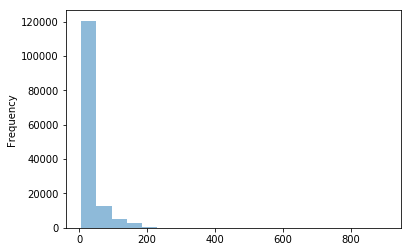

In [8]:
ax = df['Dwell_Time'].plot.hist(bins=20, alpha=0.5)

In [30]:
df['Dwell_Time'].describe()

count    141628.000000
mean         28.614631
std          34.921642
min           6.000000
25%           9.000000
50%          15.000000
75%          32.000000
max         901.000000
Name: Dwell_Time, dtype: float64

## DateTime

In [34]:
df['DateTime'].describe()

count                  141628
unique                  65808
top       2018-04-24 08:58:50
freq                       19
first     2018-01-01 06:58:50
last      2018-06-30 23:12:50
Name: DateTime, dtype: object

In [35]:
df.groupby(['DateTime']).size()

DateTime
2018-01-01 06:58:50    1
2018-01-01 09:30:40    2
2018-01-01 09:32:30    2
2018-01-01 09:48:20    1
2018-01-01 10:05:10    1
2018-01-01 10:10:40    1
2018-01-01 10:28:30    1
2018-01-01 10:53:50    3
2018-01-01 11:03:20    2
2018-01-01 11:11:40    1
2018-01-01 11:15:30    5
2018-01-01 11:17:00    1
2018-01-01 11:19:30    2
2018-01-01 11:23:50    1
2018-01-01 11:45:20    1
2018-01-01 11:46:00    1
2018-01-01 11:46:20    1
2018-01-01 12:02:50    1
2018-01-01 12:03:50    4
2018-01-01 12:04:00    1
2018-01-01 12:13:50    1
2018-01-01 12:16:40    1
2018-01-01 12:30:30    1
2018-01-01 12:31:30    1
2018-01-01 12:42:00    2
2018-01-01 12:57:00    2
2018-01-01 12:59:00    1
2018-01-01 13:05:30    1
2018-01-01 13:30:50    2
2018-01-01 13:47:20    1
                      ..
2018-06-30 20:00:10    1
2018-06-30 20:00:30    1
2018-06-30 20:01:30    1
2018-06-30 20:01:40    1
2018-06-30 20:01:50    1
2018-06-30 20:06:30    1
2018-06-30 20:07:00    1
2018-06-30 20:07:30    1
2018-06-30 20:07